In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df=pd.read_csv('/content/odi.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301


In [ ]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [ ]:
# Removing unwanted cols - reduce memory size
cols_to_remove = ['mid' ,'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=cols_to_remove , axis=1 , inplace = True)

In [ ]:
df.shape

(350899, 10)

In [ ]:
df['bat_team'].unique()

array(['England', 'Pakistan', 'Sri Lanka', 'Australia', 'South Africa',
       'New Zealand', 'Bangladesh', 'West Indies', 'India', 'Zimbabwe',
       'Ireland', 'Scotland', 'Kenya', 'Bermuda', 'Netherlands', 'Canada',
       'Asia XI', 'Afghanistan', 'United Arab Emirates', 'Hong Kong',
       'Papua New Guinea'], dtype=object)

In [ ]:
values_to_remove = ['Kenya', 'Bermuda', 'Canada', 'Asia XI', 'Hong Kong', 'Papua New Guinea']
df = df[~df['bat_team'].isin(values_to_remove)]

In [ ]:
values_to_remove = ['Kenya', 'Bermuda', 'Canada', 'Asia XI', 'Hong Kong', 'Papua New Guinea']
df = df[~df['bowl_team'].isin(values_to_remove)]

In [ ]:
len(df['bowl_team'].unique())

15

In [ ]:
df

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,0,0,0.1,0,0,301
1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,0,0,0.2,0,0,301
2,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,4,0,0.3,4,0,301
3,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,6,0,0.4,6,0,301
4,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,6,0,0.5,6,0,301
...,...,...,...,...,...,...,...,...,...,...
350894,2017-07-10,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,201,8,49.2,39,0,203
350895,2017-07-10,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,201,8,49.3,39,0,203
350896,2017-07-10,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,201,8,49.4,38,0,203
350897,2017-07-10,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,202,8,49.5,38,0,203


In [ ]:
# filtering based on 5 overs
df = df[df['overs']>=5.0]
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
33,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,33,0,5.1,27,0,301
34,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,33,0,5.2,27,0,301
35,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,37,0,5.3,31,0,301
36,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,37,0,5.4,31,0,301
37,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,37,0,5.5,31,0,301


In [ ]:
df.shape

(298182, 10)

In [ ]:
# converting date cols from string to date time object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

<ipython-input-13-7975b9555615>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))


In [ ]:
# converting categorical features using 'One Hot Encoding' # for numerical values
#feature engineering
cat_df = pd.get_dummies(data = df, columns = ['venue','bat_team' , 'bowl_team'])

In [ ]:
cat_df.head(2)


,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,venue_AMI Stadium,venue_Adelaide Oval,venue_Andhra Cricket Association-Visakhapatnam District Cricket Association Stadium,...,bowl_team_Ireland,bowl_team_Netherlands,bowl_team_New Zealand,bowl_team_Pakistan,bowl_team_Scotland,bowl_team_South Africa,bowl_team_Sri Lanka,bowl_team_United Arab Emirates,bowl_team_West Indies,bowl_team_Zimbabwe
33,2006-06-13,33,0,5.1,27,0,301,0,0,0,...,1,0,0,0,0,0,0,0,0,0
34,2006-06-13,33,0,5.2,27,0,301,0,0,0,...,1,0,0,0,0,0,0,0,0,0


Train 76%

Test 24%

In [ ]:
# split the data into train and test set - based on date column
X_train = cat_df.drop(labels = 'total', axis = 1)[cat_df['date'].dt.year <= 2014]
X_test = cat_df.drop(labels = 'total', axis = 1) [cat_df['date'].dt.year >= 2015]

In [ ]:
len(X_train)

226922

In [ ]:
len(X_test)

71260

In [ ]:
# since only one column so cosidered as series
y_train = cat_df[cat_df['date'].dt.year <= 2014]['total'].values
y_test = cat_df[cat_df['date'].dt.year >= 2015]['total'].values

In [ ]:
# dropping date column
X_train.drop(labels = 'date', axis = True, inplace = True)
X_test.drop(labels = 'date', axis = True, inplace = True)

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor()
}

In [ ]:
results = {}

for model_name, model in models.items():
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store the results in a dictionary
    results[model_name] = {
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "Root Mean Squared Error": rmse,
        "R-squared": r2
    }

In [ ]:
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("\n")

Model: Linear Regression
Mean Squared Error: 84692703804543008768.0000
Mean Absolute Error: 2289516034.3504
Root Mean Squared Error: 9202863891.4494
R-squared: -19468503643065816.0000


Model: Lasso Regression
Mean Squared Error: 2036.5377
Mean Absolute Error: 33.9316
Root Mean Squared Error: 45.1280
R-squared: 0.5319


Model: Ridge Regression
Mean Squared Error: 2034.0571
Mean Absolute Error: 34.5257
Root Mean Squared Error: 45.1005
R-squared: 0.5324


Model: Random Forest Regressor
Mean Squared Error: 2216.6642
Mean Absolute Error: 34.1676
Root Mean Squared Error: 47.0815
R-squared: 0.4905


Model: Decision Tree Regressor
Mean Squared Error: 2927.1388
Mean Absolute Error: 39.7745
Root Mean Squared Error: 54.1030
R-squared: 0.3271




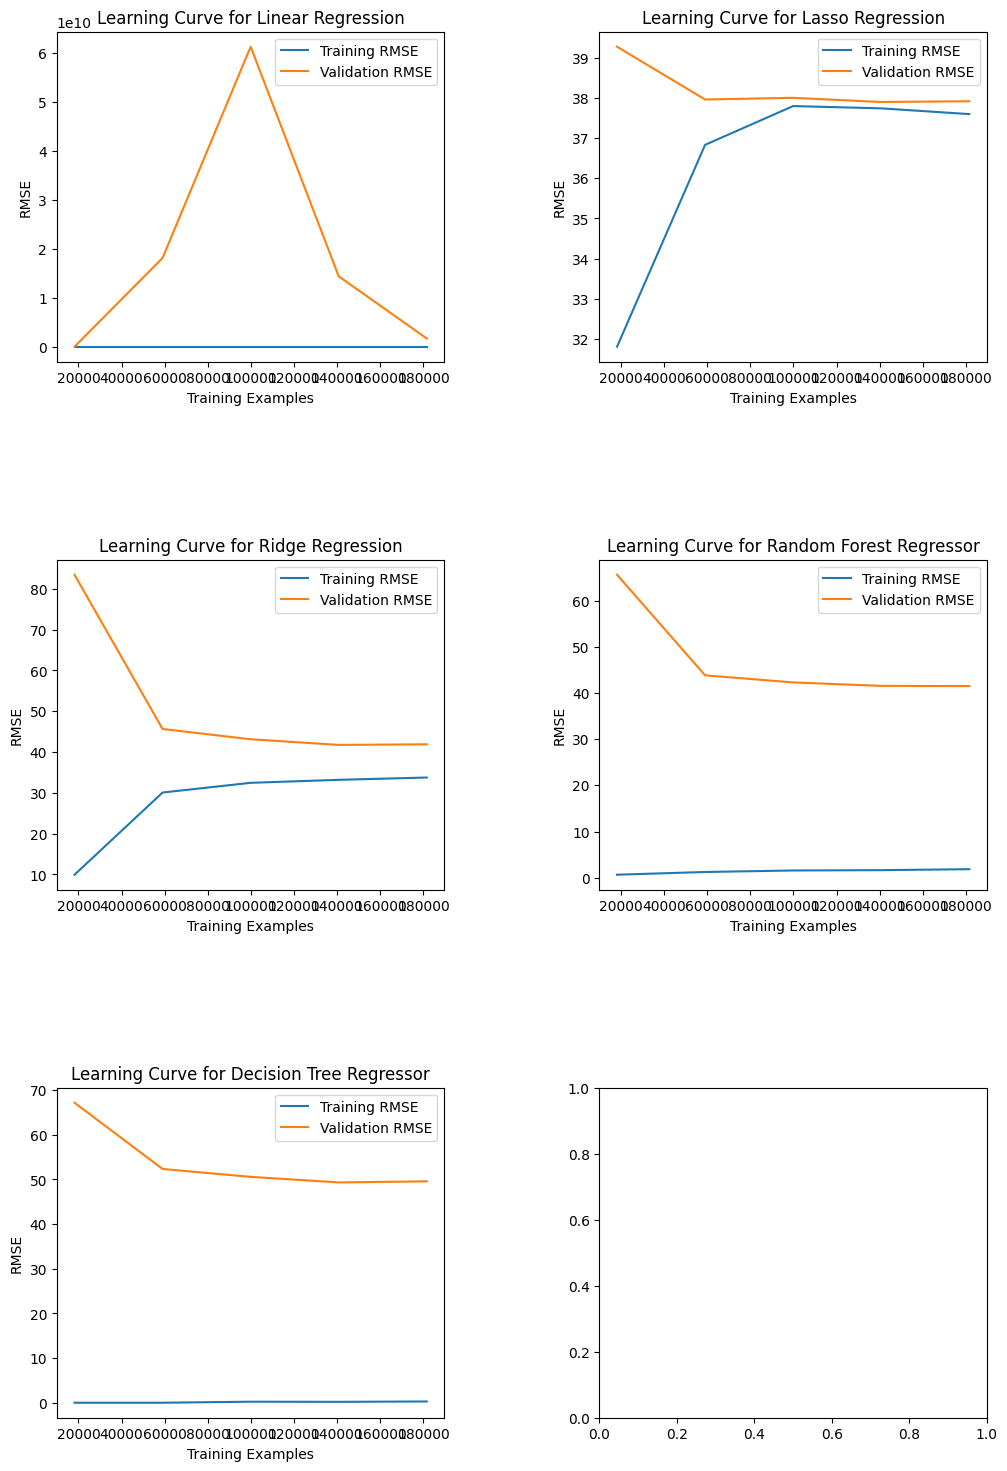

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12, 18))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Loop through the models and plot the learning curve for each
for idx, (model_name, model) in enumerate(models.items()):
    ax = axes[idx // 2, idx % 2]

    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1,
                                                            scoring='neg_mean_squared_error')
    train_rmse = np.sqrt(-train_scores.mean(axis=1))
    test_rmse = np.sqrt(-test_scores.mean(axis=1))

    ax.plot(train_sizes, train_rmse, label='Training RMSE')
    ax.plot(train_sizes, test_rmse, label='Validation RMSE')
    ax.set_title(f'Learning Curve for {model_name}')
    ax.set_xlabel('Training Examples')
    ax.set_ylabel('RMSE')
    ax.legend()

plt.show()

<ipython-input-26-b62b2b09751f>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred, ax=ax)
<ipython-input-26-b62b2b09751f>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred, ax=ax)
<ipython-input-26-b62b2b09751f>:18: UserWarning: 

`distplot` is a deprecated functi

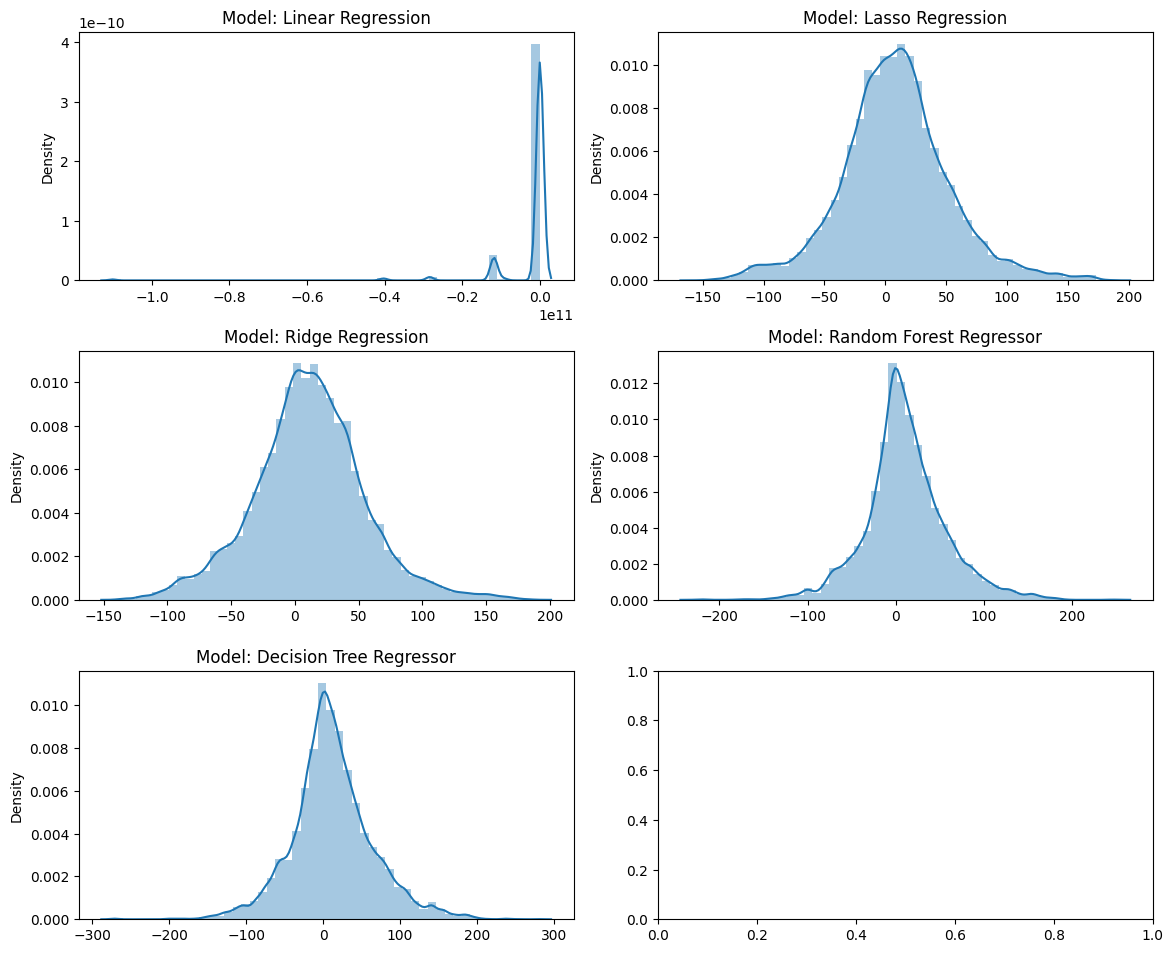

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
fig.tight_layout(pad=3.0)

# Iterate through models and plot their fit
for (model_name, model), ax in zip(models.items(), axes.flatten()):
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Plot the fit - Replace this comment with your specific plot code
    # For example, you can plot a distribution of residuals using seaborn
    sns.distplot(y_test - y_pred, ax=ax)
    ax.set_title(f'Model: {model_name}')

# Show the plots
plt.show()